In [204]:
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier

import statistics

In [2]:
# df = pd.read_excel('MERGED_FINAL.xlsx', index_col='Primary Key')

In [3]:
# df.info()

In [4]:
# df2 = pd.read_excel('MERGED_FINAL2.xlsx', index_col='Primary Key', sheet_name=0)

In [5]:
# df2.info()

In [6]:
# df['Service Category'].value_counts()

In [7]:
# df2['Service Category'].value_counts()

In [8]:
# final_df = pd.concat( [df,df2] )

In [9]:
# final_df = final_df[ final_df['Service Category'] != 'Oil, Lube & Preventive Maintenance Service' ]

In [144]:
final_df = pd.read_excel('FINAL_FINAL.xlsx', index_col='Primary Key')

In [145]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30585 entries, 17 to 43007
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           30585 non-null  datetime64[ns]
 1   Mileage In        30585 non-null  int64         
 2   Work Order        30585 non-null  int64         
 3   Model             30585 non-null  object        
 4   Line Type         30585 non-null  object        
 5   Service Category  30585 non-null  object        
 6   Service Package   30563 non-null  object        
 7   Description       30585 non-null  object        
 8   Definition        13496 non-null  object        
 9   Price             30585 non-null  float64       
 10  Quantity          30585 non-null  float64       
 11  Total             30585 non-null  float64       
 12  Discount          30585 non-null  float64       
 13  Net Total         30585 non-null  float64       
 14  ContactID         305

In [146]:
final_df['Service Category'].value_counts()

Minor Preventive Maintenance Service                                  8865
Change Oil                                                            4173
Major Preventive Maintenance Service                                  3992
Brakes                                                                2444
HVAC (Heating, Ventilation & Air Conditioning)                        1475
Engine                                                                1433
Transmission & Clutch                                                 1393
Complete Vehicle Inspection                                           1273
Electrical (Belts, Lighting, Starting & Charging Systems)              937
Engine Oil / Oil Filter                                                866
Cooling System                                                         827
Tires & Wheels                                                         797
Driveability (Fuel, Ignition & Emission Systems)                       796
Fuel Filter / Air Filter 

In [147]:
final_df['Service Category'].value_counts().nlargest(8)

Minor Preventive Maintenance Service              8865
Change Oil                                        4173
Major Preventive Maintenance Service              3992
Brakes                                            2444
HVAC (Heating, Ventilation & Air Conditioning)    1475
Engine                                            1433
Transmission & Clutch                             1393
Complete Vehicle Inspection                       1273
Name: Service Category, dtype: int64

### Model 2

In [149]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25048 entries, 17 to 43007
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           25048 non-null  datetime64[ns]
 1   Mileage In        25048 non-null  int64         
 2   Work Order        25048 non-null  int64         
 3   Model             25048 non-null  object        
 4   Line Type         25048 non-null  object        
 5   Service Category  25048 non-null  object        
 6   Service Package   25026 non-null  object        
 7   Description       25048 non-null  object        
 8   Definition        10599 non-null  object        
 9   Price             25048 non-null  float64       
 10  Quantity          25048 non-null  float64       
 11  Total             25048 non-null  float64       
 12  Discount          25048 non-null  float64       
 13  Net Total         25048 non-null  float64       
 14  ContactID         250

In [171]:
X = new_df[['Make','Year','Model','Mileage In']]

In [172]:
len(X.Make.value_counts())

21

In [173]:
len(X.Model.value_counts())

170

In [174]:
Y = new_df['Service Category']
len(Y)

25048

In [175]:
len(Y.unique())

8

In [176]:
Y.value_counts()

Minor Preventive Maintenance Service              8865
Change Oil                                        4173
Major Preventive Maintenance Service              3992
Brakes                                            2444
HVAC (Heating, Ventilation & Air Conditioning)    1475
Engine                                            1433
Transmission & Clutch                             1393
Complete Vehicle Inspection                       1273
Name: Service Category, dtype: int64

In [177]:
Y.value_counts(normalize=True)

Minor Preventive Maintenance Service              0.353920
Change Oil                                        0.166600
Major Preventive Maintenance Service              0.159374
Brakes                                            0.097573
HVAC (Heating, Ventilation & Air Conditioning)    0.058887
Engine                                            0.057210
Transmission & Clutch                             0.055613
Complete Vehicle Inspection                       0.050822
Name: Service Category, dtype: float64

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=13)

In [179]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(22543, 4) (2505, 4) (22543,) (2505,)


In [180]:
lencoder = LabelEncoder()

In [181]:
lencoder.fit(Y_train)

LabelEncoder()

In [182]:
Y_train_lencoded = lencoder.transform(Y_train)
Y_test_lencoded = lencoder.transform(Y_test)

In [183]:
pd.DataFrame(Y_train_lencoded).value_counts()

6    7990
1    3745
5    3605
0    2192
4    1317
3    1308
7    1248
2    1138
dtype: int64

In [184]:
pd.DataFrame(Y_test_lencoded).value_counts()

6    875
1    428
5    387
0    252
4    158
7    145
2    135
3    125
dtype: int64

#### Target encoder

In [185]:
# instantiate encoder

encoder = ce.TargetEncoder(cols=['Make', 'Year', 'Model'])

In [186]:
encoder.fit(X_train, Y_train_lencoded)

C:\Users\Nico\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['Make', 'Year', 'Model'])

In [187]:
# encode features

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [188]:
X_train_encoded

,Make,Year,Model,Mileage In
Primary Key,,,,
1499,3.906621,3.326648,4.035088,74426
23623,3.906621,3.283270,3.784841,14118
15060,3.862482,4.337253,4.209199,14020
13151,4.217225,3.976122,4.477733,25810
7075,3.301708,4.176049,3.717391,34779
...,...,...,...,...
5098,3.906621,3.834663,3.894737,112480
41262,3.678322,3.623278,4.011976,248027
492,3.862482,3.660000,3.576190,163992


#### RF Classifier with Random Oversampling

In [195]:
skf = StratifiedKFold(n_splits=20)

mean_acc = []
mean_bal_acc = []
mean_f1_mic = []
mean_f1_mac = []
for fold, (train_index, test_index) in enumerate(skf.split(X_train_encoded, Y_train_lencoded), 1):
    x_train = X_train_encoded.iloc[train_index]
    y_train = Y_train_lencoded.ravel()[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    x_test = X_train_encoded.iloc[test_index]
    y_test = Y_train_lencoded.ravel()[test_index]  # See comment on ravel and  y_train
    model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='auto'), \
                                      sampler=RandomOverSampler(), n_estimators=150)
#     model = BalancedBaggingClassifier(base_estimator=XGBClassifier(learning_rate=0.2), \
#                                       sampler=RandomOverSampler(), n_jobs=-1)

#     model = OneVsRestClassifier(RandomForestClassifier())
#     model = RandomForestClassifier(class_weight='balanced')
#     model = XGBClassifier(learning_rate=0.2, n_jobs=-1)
#     model = KNeighborsClassifier(n_neighbors=2, weights='distance')
#     model = ExtraTreesClassifier(max_depth=30)
#     model = HistGradientBoostingClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = model.score(x_test, y_test)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    mean_acc.append(acc)
    mean_bal_acc.append(balanced_acc)
    mean_f1_mic.append(f1_micro)
    mean_f1_mac.append(f1_macro)
    
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    print(f'For fold {fold}:')
    print(f'Accuracy: {acc}')
    print(f'Balanced accuracy: {balanced_acc}')
    print(f'f-score_micro: {f1_micro}')
    print(f'f-score_macro: {f1_macro}\n')
#     %notify -m "another iteration done"

print(f'Mean Accuracy: {statistics.mean(mean_acc)}')
print(f'Mean Balanced accuracy: {statistics.mean(mean_bal_acc)}')
print(f'Mean f1-score_micro: {statistics.mean(mean_f1_mic)}')
print(f'Mean f1-score_macro: {statistics.mean(mean_f1_mac)}')

(21415, 4) (21415,) (1128, 4) (1128,)
For fold 1:
Accuracy: 0.8129432624113475
Balanced accuracy: 0.757541124261692
f-score_micro: 0.8129432624113475
f-score_macro: 0.7251577708929571

(21415, 4) (21415,) (1128, 4) (1128,)
For fold 2:
Accuracy: 0.825354609929078
Balanced accuracy: 0.7679892485540314
f-score_micro: 0.825354609929078
f-score_macro: 0.7439881999786877

(21415, 4) (21415,) (1128, 4) (1128,)
For fold 3:
Accuracy: 0.7907801418439716
Balanced accuracy: 0.7237198948339078
f-score_micro: 0.7907801418439716
f-score_macro: 0.6985079529253284

(21416, 4) (21416,) (1127, 4) (1127,)
For fold 4:
Accuracy: 0.8172138420585625
Balanced accuracy: 0.7581648524163445
f-score_micro: 0.8172138420585625
f-score_macro: 0.7413308794170819

(21416, 4) (21416,) (1127, 4) (1127,)
For fold 5:
Accuracy: 0.8331854480922803
Balanced accuracy: 0.7729801911775989
f-score_micro: 0.8331854480922802
f-score_macro: 0.7587529091115943

(21416, 4) (21416,) (1127, 4) (1127,)
For fold 6:
Accuracy: 0.81366459627

#### KNN

In [190]:
skf = StratifiedKFold(n_splits=20)

mean_acc = []
mean_bal_acc = []
mean_f1_mic = []
mean_f1_mac = []
for fold, (train_index, test_index) in enumerate(skf.split(X_train_encoded, Y_train_lencoded), 1):
    x_train = X_train_encoded.iloc[train_index]
    y_train = Y_train_lencoded.ravel()[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    x_test = X_train_encoded.iloc[test_index]
    y_test = Y_train_lencoded.ravel()[test_index]  # See comment on ravel and  y_train
#     model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='auto'), \
#                                       sampler=RandomOverSampler(), n_estimators=150)
#     model = BalancedBaggingClassifier(base_estimator=XGBClassifier(learning_rate=0.2), \
#                                       sampler=RandomOverSampler(), n_jobs=-1)

#     model = OneVsRestClassifier(RandomForestClassifier())
#     model = RandomForestClassifier(class_weight='balanced')
#     model = XGBClassifier(learning_rate=0.2, n_jobs=-1)
    model = KNeighborsClassifier(n_neighbors=15, weights='distance')
#     model = ExtraTreesClassifier(max_depth=30)
#     model = HistGradientBoostingClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = model.score(x_test, y_test)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    mean_acc.append(acc)
    mean_bal_acc.append(balanced_acc)
    mean_f1_mic.append(f1_micro)
    mean_f1_mac.append(f1_macro)
    
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    print(f'For fold {fold}:')
    print(f'Accuracy: {acc}')
    print(f'Balanced accuracy: {balanced_acc}')
    print(f'f-score_micro: {f1_micro}')
    print(f'f-score_macro: {f1_macro}\n')
#     %notify -m "another iteration done"

print(f'Mean Accuracy: {statistics.mean(mean_acc)}')
print(f'Mean Balanced accuracy: {statistics.mean(mean_bal_acc)}')
print(f'Mean f1-score_micro: {statistics.mean(mean_f1_mic)}')
print(f'Mean f1-score_macro: {statistics.mean(mean_f1_mac)}')

(21415, 4) (21415,) (1128, 4) (1128,)
For fold 1:
Accuracy: 0.8413120567375887
Balanced accuracy: 0.7275713661738639
f-score_micro: 0.8413120567375887
f-score_macro: 0.740428209843551

(21415, 4) (21415,) (1128, 4) (1128,)
For fold 2:
Accuracy: 0.851063829787234
Balanced accuracy: 0.7439598831166099
f-score_micro: 0.8510638297872339
f-score_macro: 0.758107016909189

(21415, 4) (21415,) (1128, 4) (1128,)
For fold 3:
Accuracy: 0.8448581560283688
Balanced accuracy: 0.7226817389949441
f-score_micro: 0.8448581560283688
f-score_macro: 0.7381702430020806

(21416, 4) (21416,) (1127, 4) (1127,)
For fold 4:
Accuracy: 0.8464951197870453
Balanced accuracy: 0.7345441510265326
f-score_micro: 0.8464951197870453
f-score_macro: 0.7450910842037846

(21416, 4) (21416,) (1127, 4) (1127,)
For fold 5:
Accuracy: 0.8509316770186336
Balanced accuracy: 0.7403083691784206
f-score_micro: 0.8509316770186336
f-score_macro: 0.7600961075553241

(21416, 4) (21416,) (1127, 4) (1127,)
For fold 6:
Accuracy: 0.85536823425

#### Test model's performance

In [191]:
X_test_encoded

,Make,Year,Model,Mileage In
Primary Key,,,,
3240,3.862482,2.925690,3.626866,84903
5525,3.862482,4.322303,4.209199,46723
13784,4.217225,3.623278,4.301887,117293
13283,4.217225,3.526829,4.301887,302789
4121,4.217225,4.322303,4.787561,56106
...,...,...,...,...
24303,4.217225,4.097502,4.787561,76046
9729,3.906621,4.387218,3.894737,132898
6320,3.862482,3.623278,3.576190,67608


In [192]:
pd.DataFrame(lencoder.inverse_transform(Y_test_lencoded)).value_counts()

Minor Preventive Maintenance Service              875
Change Oil                                        428
Major Preventive Maintenance Service              387
Brakes                                            252
HVAC (Heating, Ventilation & Air Conditioning)    158
Transmission & Clutch                             145
Complete Vehicle Inspection                       135
Engine                                            125
dtype: int64

In [193]:
len(Y_test_lencoded)

2505

In [196]:
model.fit(X_train_encoded, Y_train_lencoded)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='auto'),
                          n_estimators=150, sampler=RandomOverSampler())

In [202]:
y_pred = model.predict(X_test_encoded)

In [203]:
acc = model.score(X_test_encoded, Y_test_lencoded)
balanced_acc = balanced_accuracy_score(Y_test_lencoded, y_pred)
f1_micro = f1_score(Y_test_lencoded, y_pred, average='micro')
f1_macro = f1_score(Y_test_lencoded, y_pred, average='macro')

print(f'Accuracy: {acc}')
print(f'Balanced accuracy: {balanced_acc}')
print(f'f-score_micro: {f1_micro}')
print(f'f-score_macro: {f1_macro}')

Accuracy: 0.8171656686626747
Balanced accuracy: 0.7553130701324522
f-score_micro: 0.8171656686626747
f-score_macro: 0.7275229326099628


In [209]:
target_names = lencoder.inverse_transform([0,1,2,3,4,5,6,7])

In [210]:
print(classification_report(Y_test_lencoded, y_pred, target_names=target_names))

                                                precision    recall  f1-score   support

                                        Brakes       0.73      0.58      0.65       252
                                    Change Oil       0.89      0.92      0.91       428
                   Complete Vehicle Inspection       0.50      0.24      0.32       135
                                        Engine       0.54      0.78      0.64       125
HVAC (Heating, Ventilation & Air Conditioning)       0.70      0.91      0.79       158
          Major Preventive Maintenance Service       0.92      0.88      0.90       387
          Minor Preventive Maintenance Service       0.91      0.88      0.89       875
                         Transmission & Clutch       0.63      0.85      0.72       145

                                      accuracy                           0.82      2505
                                     macro avg       0.73      0.76      0.73      2505
                              

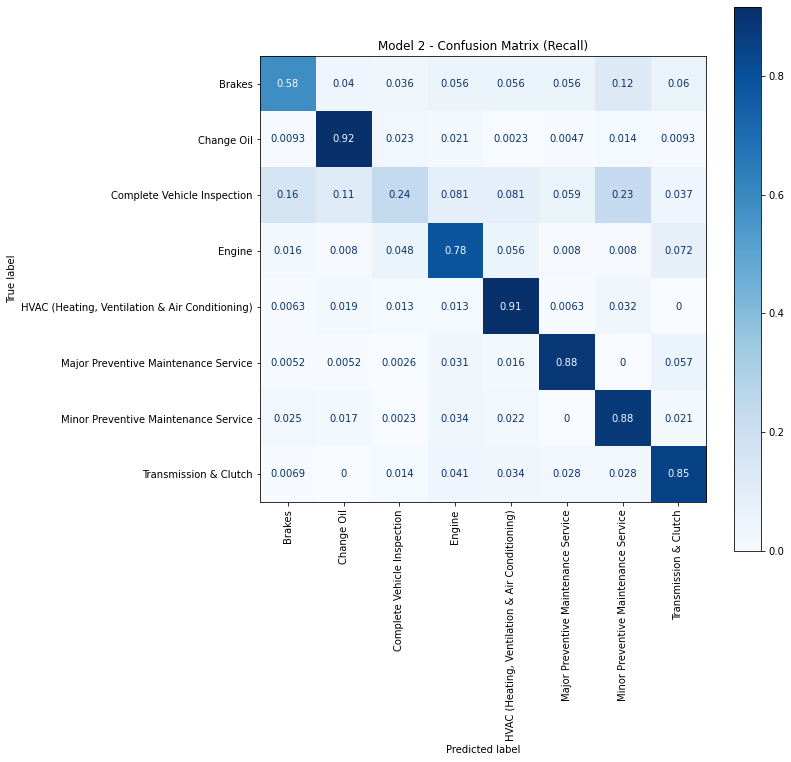

In [216]:
fig, ax = plt.subplots(figsize=(10,10))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
title = 'Model 2 - Confusion Matrix (Recall)'

disp = plot_confusion_matrix(model, X_test_encoded, Y_test_lencoded,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues, ax=ax, normalize='true', xticks_rotation='vertical')
disp.ax_.set_title(title)

# print(title)
# print(disp.confusion_matrix)

plt.show()

### Recommendation Engine

In [237]:
def make_recomm(test_sample, max_recomm, div, trained_model):
    limit = 0
    count_pre = 0
    count_post = 0
    recomm_pre = []
    recomm_post = []
    recomm_dict = {}
    
    print(f"CURRENT MILEAGE: {test_sample['Mileage In']}\n")
    increment = int(test_sample['Mileage In']/div)
    
    test_samp_post1 = test_sample.copy()
    test_samp_pre1 = test_sample.copy()
    
    while (count_pre < 5) and (limit < max_recomm):
        limit += 1
        test_samp_pre1['Mileage In'] -= increment
        
        if test_samp_pre1['Mileage In'] >= 0:
            pred = trained_model.predict(pd.DataFrame([test_samp_pre1.values], columns = test_samp_pre1.index))
            recomm_pre.append( lencoder.inverse_transform(pred)[0] )
            count_pre = len( set(recomm_pre) )
            print(f"Mileage: {test_samp_pre1['Mileage In']}")
            print(lencoder.inverse_transform(pred)[0] + '\n')
        else:
            break
    print('END OF PRE RECOMMS\n\n\n')
    
    limit = 0        
    
    print(f"CURRENT MILEAGE: {test_sample['Mileage In']}\n")
    while (count_post < 5) and (limit < max_recomm):
        limit += 1
        test_samp_post1['Mileage In'] += increment
        
        if True:            
            pred = trained_model.predict(pd.DataFrame([test_samp_post1.values], columns = test_samp_post1.index))
            recomm_post.append( lencoder.inverse_transform(pred)[0] )
            count_post = len( set(recomm_post) )
            print(f"Mileage: {test_samp_post1['Mileage In']}")
            print(lencoder.inverse_transform(pred)[0] + '\n')
    print('END OF POST RECOMMS\n\n\n')
    
    print(f"Length of Pre recomms: {len(recomm_pre)}")
    print(f"No. of distinct pre recomms: {count_pre}")
    print(f"Length of Post recomms: {len(recomm_post)}")
    print(f"No. of distinct post recomms: {count_post}")
    
    recomm_dict['pre'] = list(set(recomm_pre))
    recomm_dict['post'] = list(set(recomm_post))
    
    return recomm_dict

### Binning mileage

In [221]:
bins=50

In [222]:
labels = pd.qcut(final_df['Mileage In'],bins).cat.categories.astype(str)
labels

Index(['(-0.001, 4413.0]', '(4413.0, 11908.0]', '(11908.0, 15874.0]',
       '(15874.0, 19810.0]', '(19810.0, 22030.0]', '(22030.0, 25015.0]',
       '(25015.0, 26693.0]', '(26693.0, 29831.0]', '(29831.0, 31335.0]',
       '(31335.0, 33563.6]', '(33563.6, 35601.0]', '(35601.0, 37789.0]',
       '(37789.0, 40058.0]', '(40058.0, 41243.0]', '(41243.0, 43185.0]',
       '(43185.0, 45211.0]', '(45211.0, 47148.0]', '(47148.0, 49379.0]',
       '(49379.0, 50776.0]', '(50776.0, 52875.0]', '(52875.0, 55206.0]',
       '(55206.0, 57737.0]', '(57737.0, 60000.0]', '(60000.0, 61790.0]',
       '(61790.0, 64359.0]', '(64359.0, 66438.0]', '(66438.0, 69080.0]',
       '(69080.0, 71103.08]', '(71103.08, 74014.0]', '(74014.0, 76742.0]',
       '(76742.0, 79412.0]', '(79412.0, 81323.0]', '(81323.0, 84894.08]',
       '(84894.08, 89079.0]', '(89079.0, 93004.0]', '(93004.0, 95807.0]',
       '(95807.0, 100184.0]', '(100184.0, 103436.0]', '(103436.0, 107912.0]',
       '(107912.0, 112480.0]', '(112480.0, 11

In [223]:
samp = final_df.copy()

In [224]:
samp['mileage bins'] = pd.qcut(final_df['Mileage In'],bins, labels=labels)

In [225]:
samp['mileage bins']

Primary Key
17       (66438.0, 69080.0]
18       (66438.0, 69080.0]
19       (66438.0, 69080.0]
20       (66438.0, 69080.0]
21       (66438.0, 69080.0]
                ...        
43003    (22030.0, 25015.0]
43004    (22030.0, 25015.0]
43005    (22030.0, 25015.0]
43006    (22030.0, 25015.0]
43007    (22030.0, 25015.0]
Name: mileage bins, Length: 30585, dtype: category
Categories (50, object): ['(-0.001, 4413.0]' < '(4413.0, 11908.0]' < '(11908.0, 15874.0]' < '(15874.0, 19810.0]' ... '(156430.96, 173651.0]' < '(173651.0, 194086.0]' < '(194086.0, 249358.0]' < '(249358.0, 3021518.0]']

In [226]:
for i in pd.qcut(final_df['Mileage In'],bins).cat.categories.astype(str):
    print(pd.DataFrame(samp.groupby('mileage bins')['Service Category'].value_counts()).loc[[i]])

                                                                     Service Category
mileage bins     Service Category                                                    
(-0.001, 4413.0] Change Oil                                                       113
                 Complete Vehicle Inspection                                      103
                 Minor Preventive Maintenance Service                              99
                 Tires & Wheels                                                    45
                 Brakes                                                            42
                 Major Preventive Maintenance Service                              41
                 Engine                                                            37
                 Transmission & Clutch                                             36
                 Electrical (Belts, Lighting, Starting & Chargin...                27
                 HVAC (Heating, Ventilation & Air Cond

                   Cooling System                                                     3
                                                                       Service Category
mileage bins       Service Category                                                    
(45211.0, 47148.0] Minor Preventive Maintenance Service                             192
                   Major Preventive Maintenance Service                             148
                   Change Oil                                                        50
                   Brakes                                                            35
                   HVAC (Heating, Ventilation & Air Conditioning)                    34
                   Transmission & Clutch                                             32
                   Engine Oil / Oil Filter                                           31
                   Electrical (Belts, Lighting, Starting & Chargin...                21
                   Tires & Wheel

                                                                       Service Category
mileage bins       Service Category                                                    
(76742.0, 79412.0] Major Preventive Maintenance Service                             108
                   Minor Preventive Maintenance Service                              98
                   Engine                                                            67
                   HVAC (Heating, Ventilation & Air Conditioning)                    66
                   Brakes                                                            60
                   Change Oil                                                        49
                   Electrical (Belts, Lighting, Starting & Chargin...                43
                   Engine Oil / Oil Filter                                           26
                   Complete Vehicle Inspection                                       18
                   Cooling Syste

                                                                         Service Category
mileage bins         Service Category                                                    
(173651.0, 194086.0] Change Oil                                                       100
                     Major Preventive Maintenance Service                              85
                     Minor Preventive Maintenance Service                              68
                     Engine                                                            63
                     Brakes                                                            54
                     Electrical (Belts, Lighting, Starting & Chargin...                43
                     Cooling System                                                    41
                     HVAC (Heating, Ventilation & Air Conditioning)                    39
                     Transmission & Clutch                                             38
          

In [227]:
samp['Service Category'].value_counts()

Minor Preventive Maintenance Service                                  8865
Change Oil                                                            4173
Major Preventive Maintenance Service                                  3992
Brakes                                                                2444
HVAC (Heating, Ventilation & Air Conditioning)                        1475
Engine                                                                1433
Transmission & Clutch                                                 1393
Complete Vehicle Inspection                                           1273
Electrical (Belts, Lighting, Starting & Charging Systems)              937
Engine Oil / Oil Filter                                                866
Cooling System                                                         827
Tires & Wheels                                                         797
Driveability (Fuel, Ignition & Emission Systems)                       796
Fuel Filter / Air Filter 

In [228]:
total_dict = pd.DataFrame(samp['Service Category'].value_counts()).to_dict()['Service Category']
total_dict

{'Minor Preventive Maintenance Service': 8865,
 'Change Oil': 4173,
 'Major Preventive Maintenance Service': 3992,
 'Brakes': 2444,
 'HVAC (Heating, Ventilation & Air Conditioning)': 1475,
 'Engine': 1433,
 'Transmission & Clutch': 1393,
 'Complete Vehicle Inspection': 1273,
 'Electrical (Belts, Lighting, Starting & Charging Systems)': 937,
 'Engine Oil / Oil Filter': 866,
 'Cooling System': 827,
 'Tires & Wheels': 797,
 'Driveability (Fuel, Ignition & Emission Systems)': 796,
 'Fuel Filter / Air Filter': 585,
 'Accessories (Gauges, Power Accessories, Vision & Air Bag)': 322,
 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)': 214,
 'Batteries': 193}

In [229]:
df_bin = pd.DataFrame(samp.groupby('mileage bins')['Service Category'].value_counts())
df_bin.columns = ['count']
df_bin

count
mileage bins          Service Category                                         
(-0.001, 4413.0]      Change Oil                                            113
                      Complete Vehicle Inspection                           103
                      Minor Preventive Maintenance Service                   99
                      Tires & Wheels                                         45
                      Brakes                                                 42
...                                                                         ...
(249358.0, 3021518.0] Tires & Wheels                                         13
                      Accessories (Gauges, Power Accessories, Vision ...      5
                      Fuel Filter / Air Filter                                5
                      Batteries                                               4
                      Drive Train (Final Drive, Transaxle, Differenti...      3

[811 rows x 1 columns]

In [230]:
df_bin = df_bin.reset_index(level=1)
df_bin

,Service Category,count
mileage bins,,
"(-0.001, 4413.0]",Change Oil,113
"(-0.001, 4413.0]",Complete Vehicle Inspection,103
"(-0.001, 4413.0]",Minor Preventive Maintenance Service,99
"(-0.001, 4413.0]",Tires & Wheels,45
"(-0.001, 4413.0]",Brakes,42
...,...,...
"(249358.0, 3021518.0]",Tires & Wheels,13
"(249358.0, 3021518.0]","Accessories (Gauges, Power Accessories, Vision...",5
"(249358.0, 3021518.0]",Fuel Filter / Air Filter,5


In [231]:
df_bin['total'] = df_bin["Service Category"].map(total_dict)

In [232]:
df_bin['percentage'] = df_bin['count']/df_bin['total']

In [233]:
df_bin

,Service Category,count,total,percentage
mileage bins,,,,
"(-0.001, 4413.0]",Change Oil,113,4173,0.027079
"(-0.001, 4413.0]",Complete Vehicle Inspection,103,1273,0.080911
"(-0.001, 4413.0]",Minor Preventive Maintenance Service,99,8865,0.011168
"(-0.001, 4413.0]",Tires & Wheels,45,797,0.056462
"(-0.001, 4413.0]",Brakes,42,2444,0.017185
...,...,...,...,...
"(249358.0, 3021518.0]",Tires & Wheels,13,797,0.016311
"(249358.0, 3021518.0]","Accessories (Gauges, Power Accessories, Vision...",5,322,0.015528
"(249358.0, 3021518.0]",Fuel Filter / Air Filter,5,585,0.008547


In [234]:
for i in pd.qcut(final_df['Mileage In'],bins).cat.categories.astype(str):
    display(df_bin.loc[i, ['Service Category', 'percentage']].sort_values('percentage',ascending=False).head(6))

,Service Category,percentage
mileage bins,,
"(-0.001, 4413.0]",Complete Vehicle Inspection,0.080911
"(-0.001, 4413.0]",Tires & Wheels,0.056462
"(-0.001, 4413.0]","Accessories (Gauges, Power Accessories, Vision...",0.046584
"(-0.001, 4413.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.028815
"(-0.001, 4413.0]",Change Oil,0.027079
"(-0.001, 4413.0]","Driveability (Fuel, Ignition & Emission Systems)",0.026382


,Service Category,percentage
mileage bins,,
"(4413.0, 11908.0]",Change Oil,0.041936
"(4413.0, 11908.0]",Minor Preventive Maintenance Service,0.037676
"(4413.0, 11908.0]",Engine Oil / Oil Filter,0.027714
"(4413.0, 11908.0]","Accessories (Gauges, Power Accessories, Vision...",0.018634
"(4413.0, 11908.0]","Driveability (Fuel, Ignition & Emission Systems)",0.016332
"(4413.0, 11908.0]","Drive Train (Final Drive, Transaxle, Different...",0.014019


,Service Category,percentage
mileage bins,,
"(11908.0, 15874.0]",Change Oil,0.046250
"(11908.0, 15874.0]",Minor Preventive Maintenance Service,0.035420
"(11908.0, 15874.0]",Batteries,0.020725
"(11908.0, 15874.0]",Tires & Wheels,0.012547
"(11908.0, 15874.0]","Driveability (Fuel, Ignition & Emission Systems)",0.011307
"(11908.0, 15874.0]",Engine Oil / Oil Filter,0.010393


,Service Category,percentage
mileage bins,,
"(15874.0, 19810.0]",Minor Preventive Maintenance Service,0.041060
"(15874.0, 19810.0]",Change Oil,0.025162
"(15874.0, 19810.0]",Complete Vehicle Inspection,0.019639
"(15874.0, 19810.0]",Engine Oil / Oil Filter,0.019630
"(15874.0, 19810.0]","Drive Train (Final Drive, Transaxle, Different...",0.018692
"(15874.0, 19810.0]",Brakes,0.018412


,Service Category,percentage
mileage bins,,
"(19810.0, 22030.0]",Engine Oil / Oil Filter,0.038106
"(19810.0, 22030.0]",Minor Preventive Maintenance Service,0.036774
"(19810.0, 22030.0]",Fuel Filter / Air Filter,0.029060
"(19810.0, 22030.0]",Change Oil,0.028996
"(19810.0, 22030.0]","Accessories (Gauges, Power Accessories, Vision...",0.024845
"(19810.0, 22030.0]",Batteries,0.020725


,Service Category,percentage
mileage bins,,
"(22030.0, 25015.0]",Minor Preventive Maintenance Service,0.038240
"(22030.0, 25015.0]",Batteries,0.036269
"(22030.0, 25015.0]",Fuel Filter / Air Filter,0.030769
"(22030.0, 25015.0]",Engine Oil / Oil Filter,0.027714
"(22030.0, 25015.0]",Change Oil,0.021807
"(22030.0, 25015.0]","Accessories (Gauges, Power Accessories, Vision...",0.018634


,Service Category,percentage
mileage bins,,
"(25015.0, 26693.0]","Drive Train (Final Drive, Transaxle, Different...",0.056075
"(25015.0, 26693.0]",Tires & Wheels,0.050188
"(25015.0, 26693.0]","Accessories (Gauges, Power Accessories, Vision...",0.034161
"(25015.0, 26693.0]",Minor Preventive Maintenance Service,0.032713
"(25015.0, 26693.0]",Batteries,0.031088
"(25015.0, 26693.0]",Change Oil,0.029236


,Service Category,percentage
mileage bins,,
"(26693.0, 29831.0]",Tires & Wheels,0.051443
"(26693.0, 29831.0]",Batteries,0.046632
"(26693.0, 29831.0]",Minor Preventive Maintenance Service,0.036210
"(26693.0, 29831.0]","Accessories (Gauges, Power Accessories, Vision...",0.031056
"(26693.0, 29831.0]",Engine Oil / Oil Filter,0.027714
"(26693.0, 29831.0]",Fuel Filter / Air Filter,0.027350


,Service Category,percentage
mileage bins,,
"(29831.0, 31335.0]",Minor Preventive Maintenance Service,0.033277
"(29831.0, 31335.0]",Engine Oil / Oil Filter,0.032333
"(29831.0, 31335.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.027119
"(29831.0, 31335.0]",Change Oil,0.027079
"(29831.0, 31335.0]",Tires & Wheels,0.022585
"(29831.0, 31335.0]",Fuel Filter / Air Filter,0.020513


,Service Category,percentage
mileage bins,,
"(31335.0, 33563.6]",Minor Preventive Maintenance Service,0.031698
"(31335.0, 33563.6]",Fuel Filter / Air Filter,0.029060
"(31335.0, 33563.6]",Tires & Wheels,0.028858
"(31335.0, 33563.6]",Change Oil,0.025401
"(31335.0, 33563.6]",Brakes,0.024141
"(31335.0, 33563.6]",Batteries,0.020725


,Service Category,percentage
mileage bins,,
"(33563.6, 35601.0]",Tires & Wheels,0.030113
"(33563.6, 35601.0]",Minor Preventive Maintenance Service,0.028426
"(33563.6, 35601.0]","Driveability (Fuel, Ignition & Emission Systems)",0.026382
"(33563.6, 35601.0]",Batteries,0.025907
"(33563.6, 35601.0]",Major Preventive Maintenance Service,0.022295
"(33563.6, 35601.0]",Brakes,0.019640


,Service Category,percentage
mileage bins,,
"(35601.0, 37789.0]",Minor Preventive Maintenance Service,0.029554
"(35601.0, 37789.0]",Engine Oil / Oil Filter,0.026559
"(35601.0, 37789.0]",Major Preventive Maintenance Service,0.023798
"(35601.0, 37789.0]",Change Oil,0.022526
"(35601.0, 37789.0]",Tires & Wheels,0.021330
"(35601.0, 37789.0]",Fuel Filter / Air Filter,0.020513


,Service Category,percentage
mileage bins,,
"(37789.0, 40058.0]",Major Preventive Maintenance Service,0.063627
"(37789.0, 40058.0]",Fuel Filter / Air Filter,0.039316
"(37789.0, 40058.0]",Tires & Wheels,0.037641
"(37789.0, 40058.0]",Engine Oil / Oil Filter,0.032333
"(37789.0, 40058.0]","Accessories (Gauges, Power Accessories, Vision...",0.027950
"(37789.0, 40058.0]","Driveability (Fuel, Ignition & Emission Systems)",0.021357


,Service Category,percentage
mileage bins,,
"(40058.0, 41243.0]",Major Preventive Maintenance Service,0.094188
"(40058.0, 41243.0]",Batteries,0.031088
"(40058.0, 41243.0]",Tires & Wheels,0.028858
"(40058.0, 41243.0]",Engine Oil / Oil Filter,0.020785
"(40058.0, 41243.0]",Fuel Filter / Air Filter,0.020513
"(40058.0, 41243.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.018305


,Service Category,percentage
mileage bins,,
"(41243.0, 43185.0]",Major Preventive Maintenance Service,0.061373
"(41243.0, 43185.0]",Fuel Filter / Air Filter,0.047863
"(41243.0, 43185.0]",Engine Oil / Oil Filter,0.032333
"(41243.0, 43185.0]",Brakes,0.028642
"(41243.0, 43185.0]",Batteries,0.025907
"(41243.0, 43185.0]",Cooling System,0.024184


,Service Category,percentage
mileage bins,,
"(43185.0, 45211.0]",Major Preventive Maintenance Service,0.043086
"(43185.0, 45211.0]","Accessories (Gauges, Power Accessories, Vision...",0.031056
"(43185.0, 45211.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.027748
"(43185.0, 45211.0]",Engine Oil / Oil Filter,0.024249
"(43185.0, 45211.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.023729
"(43185.0, 45211.0]",Change Oil,0.019410


,Service Category,percentage
mileage bins,,
"(45211.0, 47148.0]",Major Preventive Maintenance Service,0.037074
"(45211.0, 47148.0]",Engine Oil / Oil Filter,0.035797
"(45211.0, 47148.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.023051
"(45211.0, 47148.0]",Transmission & Clutch,0.022972
"(45211.0, 47148.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.022412
"(45211.0, 47148.0]",Minor Preventive Maintenance Service,0.021658


,Service Category,percentage
mileage bins,,
"(47148.0, 49379.0]","Drive Train (Final Drive, Transaxle, Different...",0.028037
"(47148.0, 49379.0]",Engine Oil / Oil Filter,0.027714
"(47148.0, 49379.0]",Change Oil,0.024922
"(47148.0, 49379.0]",Fuel Filter / Air Filter,0.023932
"(47148.0, 49379.0]",Cooling System,0.022975
"(47148.0, 49379.0]",Minor Preventive Maintenance Service,0.021997


,Service Category,percentage
mileage bins,,
"(49379.0, 50776.0]",Engine,0.032798
"(49379.0, 50776.0]","Driveability (Fuel, Ignition & Emission Systems)",0.028894
"(49379.0, 50776.0]",Minor Preventive Maintenance Service,0.026734
"(49379.0, 50776.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.025614
"(49379.0, 50776.0]",Cooling System,0.025393
"(49379.0, 50776.0]","Accessories (Gauges, Power Accessories, Vision...",0.021739


,Service Category,percentage
mileage bins,,
"(50776.0, 52875.0]",Tires & Wheels,0.030113
"(50776.0, 52875.0]",Minor Preventive Maintenance Service,0.028652
"(50776.0, 52875.0]","Accessories (Gauges, Power Accessories, Vision...",0.027950
"(50776.0, 52875.0]",Engine Oil / Oil Filter,0.021940
"(50776.0, 52875.0]",Change Oil,0.021807
"(50776.0, 52875.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.021345


,Service Category,percentage
mileage bins,,
"(52875.0, 55206.0]","Driveability (Fuel, Ignition & Emission Systems)",0.035176
"(52875.0, 55206.0]",Tires & Wheels,0.028858
"(52875.0, 55206.0]",Minor Preventive Maintenance Service,0.028539
"(52875.0, 55206.0]",Brakes,0.021277
"(52875.0, 55206.0]",Complete Vehicle Inspection,0.021210
"(52875.0, 55206.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.018983


,Service Category,percentage
mileage bins,,
"(55206.0, 57737.0]",Batteries,0.046632
"(55206.0, 57737.0]",Tires & Wheels,0.037641
"(55206.0, 57737.0]",Cooling System,0.035067
"(55206.0, 57737.0]",Transmission & Clutch,0.032304
"(55206.0, 57737.0]",Minor Preventive Maintenance Service,0.026509
"(55206.0, 57737.0]",Engine Oil / Oil Filter,0.024249


,Service Category,percentage
mileage bins,,
"(57737.0, 60000.0]",Batteries,0.051813
"(57737.0, 60000.0]",Change Oil,0.029475
"(57737.0, 60000.0]",Brakes,0.029460
"(57737.0, 60000.0]",Fuel Filter / Air Filter,0.029060
"(57737.0, 60000.0]",Complete Vehicle Inspection,0.028280
"(57737.0, 60000.0]","Drive Train (Final Drive, Transaxle, Different...",0.023364


,Service Category,percentage
mileage bins,,
"(60000.0, 61790.0]",Minor Preventive Maintenance Service,0.031359
"(60000.0, 61790.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.027119
"(60000.0, 61790.0]",Brakes,0.023732
"(60000.0, 61790.0]",Batteries,0.020725
"(60000.0, 61790.0]",Complete Vehicle Inspection,0.017282
"(60000.0, 61790.0]",Fuel Filter / Air Filter,0.017094


,Service Category,percentage
mileage bins,,
"(61790.0, 64359.0]","Drive Train (Final Drive, Transaxle, Different...",0.079439
"(61790.0, 64359.0]","Accessories (Gauges, Power Accessories, Vision...",0.037267
"(61790.0, 64359.0]",Cooling System,0.035067
"(61790.0, 64359.0]",Tires & Wheels,0.030113
"(61790.0, 64359.0]",Fuel Filter / Air Filter,0.027350
"(61790.0, 64359.0]",Brakes,0.025777


,Service Category,percentage
mileage bins,,
"(64359.0, 66438.0]",Cooling System,0.035067
"(64359.0, 66438.0]",Transmission & Clutch,0.029433
"(64359.0, 66438.0]",Minor Preventive Maintenance Service,0.027411
"(64359.0, 66438.0]",Engine,0.026518
"(64359.0, 66438.0]",Change Oil,0.022286
"(64359.0, 66438.0]",Fuel Filter / Air Filter,0.022222


,Service Category,percentage
mileage bins,,
"(66438.0, 69080.0]",Batteries,0.056995
"(66438.0, 69080.0]",Transmission & Clutch,0.048816
"(66438.0, 69080.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.043390
"(66438.0, 69080.0]","Driveability (Fuel, Ignition & Emission Systems)",0.028894
"(66438.0, 69080.0]",Fuel Filter / Air Filter,0.025641
"(66438.0, 69080.0]",Cooling System,0.024184


,Service Category,percentage
mileage bins,,
"(69080.0, 71103.08]",Transmission & Clutch,0.049533
"(69080.0, 71103.08]","Driveability (Fuel, Ignition & Emission Systems)",0.038945
"(69080.0, 71103.08]",Batteries,0.036269
"(69080.0, 71103.08]","Electrical (Belts, Lighting, Starting & Chargi...",0.032017
"(69080.0, 71103.08]",Brakes,0.030687
"(69080.0, 71103.08]",Engine Oil / Oil Filter,0.030023


,Service Category,percentage
mileage bins,,
"(71103.08, 74014.0]","Accessories (Gauges, Power Accessories, Vision...",0.037267
"(71103.08, 74014.0]",Engine,0.036985
"(71103.08, 74014.0]",Transmission & Clutch,0.030869
"(71103.08, 74014.0]",Minor Preventive Maintenance Service,0.026622
"(71103.08, 74014.0]",Fuel Filter / Air Filter,0.025641
"(71103.08, 74014.0]",Cooling System,0.021765


,Service Category,percentage
mileage bins,,
"(74014.0, 76742.0]",Fuel Filter / Air Filter,0.030769
"(74014.0, 76742.0]",Engine,0.029309
"(74014.0, 76742.0]","Drive Train (Final Drive, Transaxle, Different...",0.028037
"(74014.0, 76742.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.025763
"(74014.0, 76742.0]","Accessories (Gauges, Power Accessories, Vision...",0.024845
"(74014.0, 76742.0]",Major Preventive Maintenance Service,0.024549


,Service Category,percentage
mileage bins,,
"(76742.0, 79412.0]",Engine,0.046755
"(76742.0, 79412.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.045891
"(76742.0, 79412.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.044746
"(76742.0, 79412.0]",Fuel Filter / Air Filter,0.030769
"(76742.0, 79412.0]",Engine Oil / Oil Filter,0.030023
"(76742.0, 79412.0]",Major Preventive Maintenance Service,0.027054


,Service Category,percentage
mileage bins,,
"(79412.0, 81323.0]",Major Preventive Maintenance Service,0.055361
"(79412.0, 81323.0]",Engine,0.049546
"(79412.0, 81323.0]","Drive Train (Final Drive, Transaxle, Different...",0.037383
"(79412.0, 81323.0]","Driveability (Fuel, Ignition & Emission Systems)",0.032663
"(79412.0, 81323.0]",Fuel Filter / Air Filter,0.023932
"(79412.0, 81323.0]",Transmission & Clutch,0.023690


,Service Category,percentage
mileage bins,,
"(81323.0, 84894.08]","Accessories (Gauges, Power Accessories, Vision...",0.037267
"(81323.0, 84894.08]",Major Preventive Maintenance Service,0.036072
"(81323.0, 84894.08]","HVAC (Heating, Ventilation & Air Conditioning)",0.032542
"(81323.0, 84894.08]",Transmission & Clutch,0.029433
"(81323.0, 84894.08]",Fuel Filter / Air Filter,0.029060
"(81323.0, 84894.08]",Engine Oil / Oil Filter,0.026559


,Service Category,percentage
mileage bins,,
"(84894.08, 89079.0]",Transmission & Clutch,0.052405
"(84894.08, 89079.0]",Engine,0.033496
"(84894.08, 89079.0]",Complete Vehicle Inspection,0.032207
"(84894.08, 89079.0]",Fuel Filter / Air Filter,0.029060
"(84894.08, 89079.0]","Accessories (Gauges, Power Accessories, Vision...",0.027950
"(84894.08, 89079.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.026441


,Service Category,percentage
mileage bins,,
"(89079.0, 93004.0]","Drive Train (Final Drive, Transaxle, Different...",0.065421
"(89079.0, 93004.0]",Engine,0.044662
"(89079.0, 93004.0]",Brakes,0.029051
"(89079.0, 93004.0]",Complete Vehicle Inspection,0.028280
"(89079.0, 93004.0]",Tires & Wheels,0.026349
"(89079.0, 93004.0]","Accessories (Gauges, Power Accessories, Vision...",0.024845


,Service Category,percentage
mileage bins,,
"(93004.0, 95807.0]","Driveability (Fuel, Ignition & Emission Systems)",0.038945
"(93004.0, 95807.0]",Cooling System,0.031439
"(93004.0, 95807.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.031186
"(93004.0, 95807.0]",Engine,0.027216
"(93004.0, 95807.0]",Brakes,0.026596
"(93004.0, 95807.0]",Change Oil,0.023964


,Service Category,percentage
mileage bins,,
"(95807.0, 100184.0]",Batteries,0.046632
"(95807.0, 100184.0]",Engine,0.042568
"(95807.0, 100184.0]","Accessories (Gauges, Power Accessories, Vision...",0.034161
"(95807.0, 100184.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.031186
"(95807.0, 100184.0]",Transmission & Clutch,0.025126
"(95807.0, 100184.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.024546


,Service Category,percentage
mileage bins,,
"(100184.0, 103436.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.058698
"(100184.0, 103436.0]",Engine,0.034892
"(100184.0, 103436.0]",Tires & Wheels,0.033877
"(100184.0, 103436.0]",Major Preventive Maintenance Service,0.033818
"(100184.0, 103436.0]",Transmission & Clutch,0.026561
"(100184.0, 103436.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.023729


,Service Category,percentage
mileage bins,,
"(103436.0, 107912.0]","Drive Train (Final Drive, Transaxle, Different...",0.084112
"(103436.0, 107912.0]",Engine,0.050244
"(103436.0, 107912.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.034152
"(103436.0, 107912.0]",Brakes,0.032733
"(103436.0, 107912.0]",Tires & Wheels,0.030113
"(103436.0, 107912.0]","Accessories (Gauges, Power Accessories, Vision...",0.027950


,Service Category,percentage
mileage bins,,
"(107912.0, 112480.0]","Drive Train (Final Drive, Transaxle, Different...",0.051402
"(107912.0, 112480.0]",Batteries,0.046632
"(107912.0, 112480.0]",Engine,0.032100
"(107912.0, 112480.0]","Accessories (Gauges, Power Accessories, Vision...",0.031056
"(107912.0, 112480.0]",Cooling System,0.030230
"(107912.0, 112480.0]",Complete Vehicle Inspection,0.028280


,Service Category,percentage
mileage bins,,
"(112480.0, 116736.32]","Drive Train (Final Drive, Transaxle, Different...",0.070093
"(112480.0, 116736.32]",Engine,0.053733
"(112480.0, 116736.32]","Accessories (Gauges, Power Accessories, Vision...",0.052795
"(112480.0, 116736.32]",Cooling System,0.036276
"(112480.0, 116736.32]",Transmission & Clutch,0.029433
"(112480.0, 116736.32]","Electrical (Belts, Lighting, Starting & Chargi...",0.027748


,Service Category,percentage
mileage bins,,
"(116736.32, 122291.0]",Cooling System,0.049577
"(116736.32, 122291.0]","Driveability (Fuel, Ignition & Emission Systems)",0.041457
"(116736.32, 122291.0]","Drive Train (Final Drive, Transaxle, Different...",0.032710
"(116736.32, 122291.0]",Engine,0.031403
"(116736.32, 122291.0]",Major Preventive Maintenance Service,0.028307
"(116736.32, 122291.0]",Tires & Wheels,0.026349


,Service Category,percentage
mileage bins,,
"(122291.0, 129875.0]","Drive Train (Final Drive, Transaxle, Different...",0.060748
"(122291.0, 129875.0]",Complete Vehicle Inspection,0.039277
"(122291.0, 129875.0]",Cooling System,0.031439
"(122291.0, 129875.0]",Major Preventive Maintenance Service,0.030311
"(122291.0, 129875.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.027119
"(122291.0, 129875.0]",Change Oil,0.026600


,Service Category,percentage
mileage bins,,
"(129875.0, 138737.0]","Drive Train (Final Drive, Transaxle, Different...",0.051402
"(129875.0, 138737.0]",Transmission & Clutch,0.042355
"(129875.0, 138737.0]","Driveability (Fuel, Ignition & Emission Systems)",0.035176
"(129875.0, 138737.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.031864
"(129875.0, 138737.0]",Engine,0.029309
"(129875.0, 138737.0]",Complete Vehicle Inspection,0.028280


,Service Category,percentage
mileage bins,,
"(138737.0, 147004.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.063729
"(138737.0, 147004.0]",Cooling System,0.049577
"(138737.0, 147004.0]",Complete Vehicle Inspection,0.035350
"(138737.0, 147004.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.026681
"(138737.0, 147004.0]",Engine,0.025820
"(138737.0, 147004.0]",Brakes,0.023732


,Service Category,percentage
mileage bins,,
"(147004.0, 156430.96]","Drive Train (Final Drive, Transaxle, Different...",0.074766
"(147004.0, 156430.96]",Batteries,0.051813
"(147004.0, 156430.96]","Driveability (Fuel, Ignition & Emission Systems)",0.051508
"(147004.0, 156430.96]","HVAC (Heating, Ventilation & Air Conditioning)",0.036610
"(147004.0, 156430.96]","Electrical (Belts, Lighting, Starting & Chargi...",0.030950
"(147004.0, 156430.96]",Brakes,0.029869


,Service Category,percentage
mileage bins,,
"(156430.96, 173651.0]",Engine,0.046057
"(156430.96, 173651.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.042034
"(156430.96, 173651.0]",Cooling System,0.037485
"(156430.96, 173651.0]","Accessories (Gauges, Power Accessories, Vision...",0.037267
"(156430.96, 173651.0]","Driveability (Fuel, Ignition & Emission Systems)",0.036432
"(156430.96, 173651.0]",Complete Vehicle Inspection,0.033778


,Service Category,percentage
mileage bins,,
"(173651.0, 194086.0]",Cooling System,0.049577
"(173651.0, 194086.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.045891
"(173651.0, 194086.0]",Engine,0.043964
"(173651.0, 194086.0]","Drive Train (Final Drive, Transaxle, Different...",0.032710
"(173651.0, 194086.0]",Transmission & Clutch,0.027279
"(173651.0, 194086.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.026441


,Service Category,percentage
mileage bins,,
"(194086.0, 249358.0]",Cooling System,0.073761
"(194086.0, 249358.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.043757
"(194086.0, 249358.0]",Engine,0.030007
"(194086.0, 249358.0]","Driveability (Fuel, Ignition & Emission Systems)",0.028894
"(194086.0, 249358.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.028475
"(194086.0, 249358.0]",Brakes,0.028232


,Service Category,percentage
mileage bins,,
"(249358.0, 3021518.0]","Electrical (Belts, Lighting, Starting & Chargi...",0.048026
"(249358.0, 3021518.0]",Engine,0.041870
"(249358.0, 3021518.0]",Cooling System,0.029021
"(249358.0, 3021518.0]","HVAC (Heating, Ventilation & Air Conditioning)",0.027797
"(249358.0, 3021518.0]",Major Preventive Maintenance Service,0.025551
"(249358.0, 3021518.0]","Driveability (Fuel, Ignition & Emission Systems)",0.022613


### Testing the Recommondation Engine

#### Function format

make_recomm( test_sample , max_recomm , div , trained_model )

#### Reaching max no. of distinct recommendations

In [242]:
# Test sample must be in this format (a Series)

test_sample = X_test_encoded.iloc[2]
test_sample

Make               4.217225
Year               3.623278
Model              4.301887
Mileage In    117293.000000
Name: 13784, dtype: float64

In [243]:
make_recomm(test_sample, 200, 20, model)

CURRENT MILEAGE: 117293.0

Mileage: 111429.0
Minor Preventive Maintenance Service

Mileage: 105565.0
Engine

Mileage: 99701.0
Minor Preventive Maintenance Service

Mileage: 93837.0
Minor Preventive Maintenance Service

Mileage: 87973.0
Complete Vehicle Inspection

Mileage: 82109.0
Complete Vehicle Inspection

Mileage: 76245.0
Complete Vehicle Inspection

Mileage: 70381.0
Brakes

Mileage: 64517.0
Minor Preventive Maintenance Service

Mileage: 58653.0
Brakes

Mileage: 52789.0
Complete Vehicle Inspection

Mileage: 46925.0
Major Preventive Maintenance Service

END OF PRE RECOMMS



CURRENT MILEAGE: 117293.0

Mileage: 123157.0
Transmission & Clutch

Mileage: 129021.0
Transmission & Clutch

Mileage: 134885.0
Transmission & Clutch

Mileage: 140749.0
HVAC (Heating, Ventilation & Air Conditioning)

Mileage: 146613.0
HVAC (Heating, Ventilation & Air Conditioning)

Mileage: 152477.0
HVAC (Heating, Ventilation & Air Conditioning)

Mileage: 158341.0
HVAC (Heating, Ventilation & Air Conditioning)

M

{'pre': ['Brakes',
  'Complete Vehicle Inspection',
  'Major Preventive Maintenance Service',
  'Engine',
  'Minor Preventive Maintenance Service'],
 'post': ['Complete Vehicle Inspection',
  'Brakes',
  'Transmission & Clutch',
  'HVAC (Heating, Ventilation & Air Conditioning)',
  'Engine']}

#### Reaching max no. of recommendations

In [240]:
test_sample = X_test_encoded.iloc[1]
test_sample

Make              3.862482
Year              4.322303
Model             4.209199
Mileage In    46723.000000
Name: 5525, dtype: float64

In [241]:
make_recomm(test_sample, 200, 20, model)

CURRENT MILEAGE: 46723.0

Mileage: 44387.0
Change Oil

Mileage: 42051.0
Complete Vehicle Inspection

Mileage: 39715.0
Brakes

Mileage: 37379.0
Minor Preventive Maintenance Service

Mileage: 35043.0
Change Oil

Mileage: 32707.0
Minor Preventive Maintenance Service

Mileage: 30371.0
Minor Preventive Maintenance Service

Mileage: 28035.0
Minor Preventive Maintenance Service

Mileage: 25699.0
Minor Preventive Maintenance Service

Mileage: 23363.0
Minor Preventive Maintenance Service

Mileage: 21027.0
Change Oil

Mileage: 18691.0
Minor Preventive Maintenance Service

Mileage: 16355.0
Minor Preventive Maintenance Service

Mileage: 14019.0
Minor Preventive Maintenance Service

Mileage: 11683.0
Minor Preventive Maintenance Service

Mileage: 9347.0
Minor Preventive Maintenance Service

Mileage: 7011.0
Complete Vehicle Inspection

Mileage: 4675.0
Complete Vehicle Inspection

Mileage: 2339.0
Complete Vehicle Inspection

Mileage: 3.0
Minor Preventive Maintenance Service

END OF PRE RECOMMS



CURR

{'pre': ['Change Oil',
  'Minor Preventive Maintenance Service',
  'Brakes',
  'Complete Vehicle Inspection'],
 'post': ['Major Preventive Maintenance Service',
  'Minor Preventive Maintenance Service',
  'Change Oil',
  'Brakes']}